# Advertisment

As we discussed in the todays' lecture, whether spending on ads $\$$. improve sales performace or not, we need to find how much should we spend on Ads, would like to present similar case study

The data set contains information about money spent on advertisement and their generated sales. Money was spent on TV, radio and newspaper ads.

The objective is to use linear regression to understand how advertisement spending impacts sales.

1. Check how overall Ads impact sales
2. Try how all channel impact sales, Case of Multiple Linear Regression We will discuss on next Lecture

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
print(pd.__version__)
print(np.__version__)
print(sns.__version__)
print(matplotlib.__version__)

0.25.3
1.16.5
0.9.0
3.1.0


In [3]:
# Preprocessing Input data
data = pd.read_csv('Advertising.csv')

In [4]:
data.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [5]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


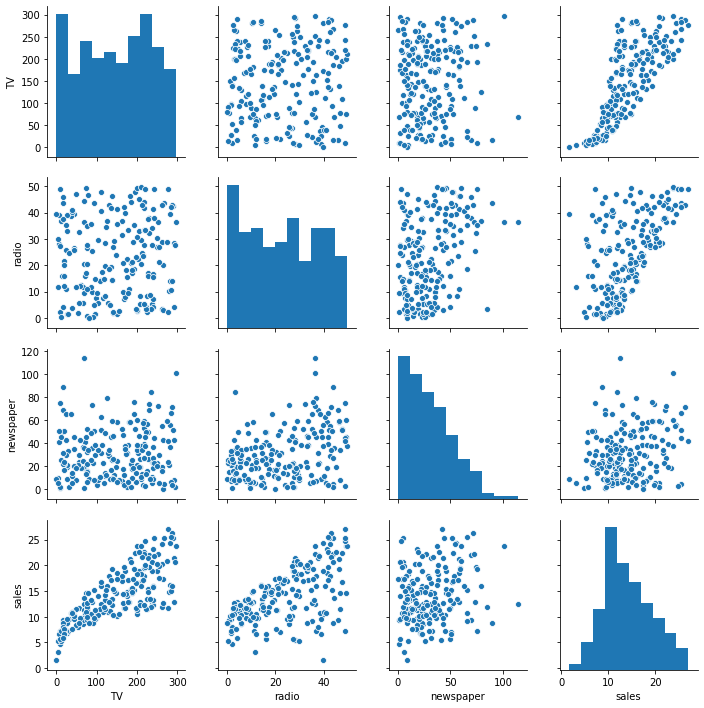

In [8]:
sns.pairplot(data)

In [9]:
mask  = np.triu(np.ones_like(data.corr())) #Created for upper traingluar matrix

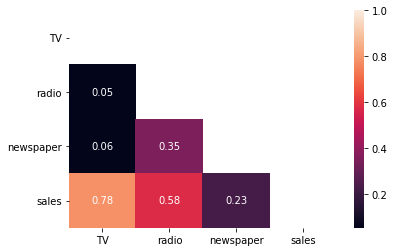

In [10]:
sns.heatmap(data.corr(), annot=True, fmt='.2f', mask=mask)

* _Create Additional feature which combine effect of all other explantory variable. called Advertisement (Adv)_
* _And then regress sales Vs Adv_

Hint: $$sales = \beta_0  + \beta_1 * Adv$$

_Notes: sales = y (reponse/dependent) & Adv = x (explantory/Independent)_
Hint: $$y = \beta_0  + \beta_1 * x$$

We need to find $$\hat{y} = \hat{\beta_0} + \hat{\beta_1} * x$$

Minimized the loss i.e MSE
$$\frac{\sum_{i=1}^{n}(\hat{y} - y)^2}{2n}$$

Coefficent of Determination, describe proportion  of the dependent variable explained by the regression model.If the regression model is “perfect”, $SSE$ is zero, and $R^2$ is 1. If the regression model is a total failure, $SSE$ is equal to $SST$, no variance is explained by regression, and $R^2$ is zero.

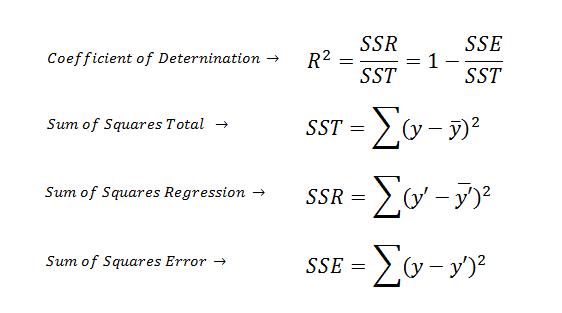

Reference Link: https://www.saedsayad.com/model_evaluation_r.htm

Anotherway to say: The coefficient of determination $R^2$ (or sometimes $r^2$) is another measure of how well the least squares performs as a predictor equation of $y$

In [11]:
data['Adv'] = data[['TV','radio','newspaper']].sum(axis=1) 

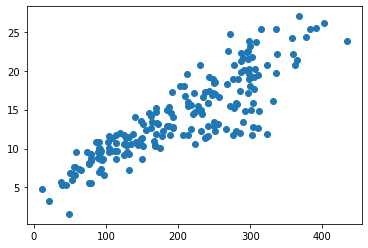

In [12]:
X = data.loc[:, 'Adv'].values
y = data.loc[:, "sales"].values
plt.scatter(X, y)

In [13]:
def gradient_descent(X,y, learning_rate=0.001, epochs=100):
    
    """Gradient descent optimization"""
    
    # Define initial value
    weight = np.random.normal(0,1,1)[0] # initial weight
    bias = 0.2, # intial bias
    n = np.float(len(X))

    weight_lst = []
    bias_lst = []
    mse = []
    
    for i in range(epochs):
        
        y_hat = (weight * X)+ bias
        mse.append(np.sum(y_hat-y)**2/(2*n)) #Mean Absolute Percentage Accuracy
        
        D_m = (-2/n) * np.sum(X * (y - y_hat)) #derivative w.r.t weight
        D_c = (-2/n) * np.sum(y - y_hat) # Derivative w.r.t bias
        
        # new weigth and bias update
        weight_lst.append(weight)
        weight = weight - (learning_rate * D_m)
        
        bias_lst.append(bias[0])
        bias = bias - (learning_rate * D_c)
        
    return mse, weight_lst, bias_lst
#-----------

def r2(y_,y):
    """Coefficent of Determination, describe proportion  of the dependent variable explained by the regression model"""
    sst = np.sum((y-y.mean())**2)
    ssr = np.sum((y_-y)**2)
    r2 = 1-(ssr/sst)
    return(r2)
#----------

In [14]:
epochs = 20000
mse, weight, bias = gradient_descent(X,y, learning_rate=1e-8, epochs=epochs)

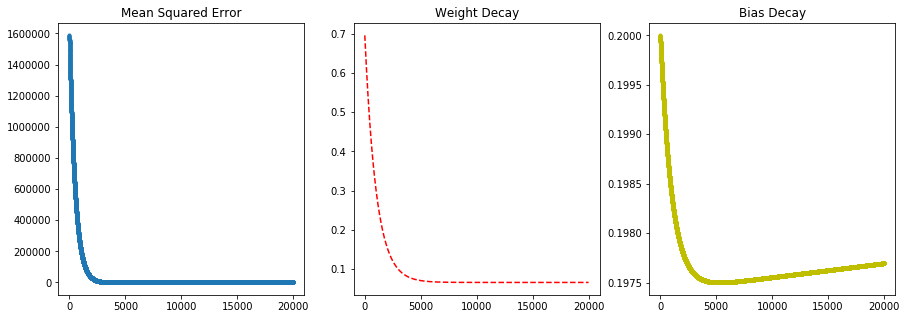

In [15]:
fig,ax  = plt.subplots(1,3, figsize=(15,5))
ax[0].plot(range(epochs),mse,'.')
ax[0].title.set_text("Mean Squared Error")

ax[1].plot(range(epochs),np.array(weight), 'r--')
ax[1].title.set_text("Weight Decay")

ax[2].plot(range(epochs),np.array(bias), 'y.-')
ax[2].title.set_text("Bias Decay")


In [16]:
idx = np.argmin(mse)
idx

5292

In [17]:
y_hat = weight[idx]*X + bias[idx]

In [18]:
pd.DataFrame({'Actual':y,'Predicted':y_hat}).head()

,Actual,Predicted
0,22.1,23.399288
1,10.4,9.069380
2,9.3,9.310277
3,18.5,17.493879
4,12.9,17.404403


Text(0, 0.5, 'Sales ($)')

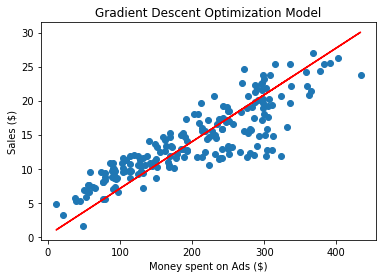

In [19]:
plt.scatter(X, y)
plt.plot(X, y_hat, 'r')
plt.title('Gradient Descent Optimization Model')
plt.xlabel("Money spent on Ads ($)")
plt.ylabel("Sales ($)")

# Using  Sklearn

In [20]:
from sklearn.linear_model  import LinearRegression

In [21]:
lmodel = LinearRegression()

In [22]:
new_X = data['Adv'].values.reshape(-1,1)
new_y = data['sales'].values.reshape(-1,1)
print(new_X.shape, new_y.shape)

(200, 1) (200, 1)


In [23]:
lmodel.fit(new_X, new_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
y_pred = lmodel.predict(new_X)

In [25]:
print("The linear model is: [y = {:.5} + {:.5} * X]".format(lmodel.intercept_[0], lmodel.coef_[0][0]))

The linear model is: [y = 4.243 + 0.048688 * X]


Text(0, 0.5, 'Sales ($)')

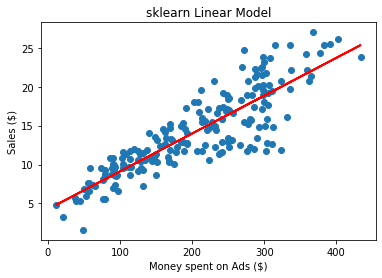

In [26]:
plt.scatter(data['Adv'], data['sales'])
plt.plot(data['Adv'], y_pred, c='r', linewidth=2)
plt.title('sklearn Linear Model')
plt.xlabel("Money spent on Ads ($)")
plt.ylabel("Sales ($)")

# _Model Comparison Gradient Vs Sklearn_

Text(0, 0.5, 'Sales ($)')

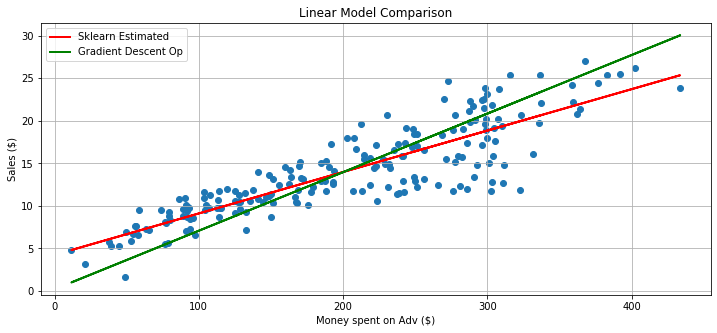

In [27]:
# Plot model side-side 
plt.figure(figsize=(12,5))
plt.scatter(data['Adv'], data['sales'], marker = 'o')
plt.plot(data['Adv'], y_pred, c='r', linewidth=2, label = 'Sklearn Estimated')
plt.plot(data['Adv'], y_hat, c='g', linewidth=2, label = "Gradient Descent Op")
plt.title('Linear Model Comparison')
plt.legend(loc='upper left')
plt.grid()
plt.xlabel("Money spent on Adv ($)")
plt.ylabel("Sales ($)")

In [28]:
# Mean Squared Error
sklearn_mse = ((y_pred.reshape(-1) - y) **2).mean()
gd_mse = ((y_hat - y) **2).mean()

In [29]:
print("Sklearn Mean Squared Error: {}".format(sklearn_mse))
print("Gradient Descent Mean Squared Error: {}".format(gd_mse))

Sklearn Mean Squared Error: 6.692219880857798
Gradient Descent Mean Squared Error: 10.181676646622924


In [30]:
print("Sklearn R - Squared Error: {}".format(r2(y_pred.reshape(-1), y)))
print("Gradient Descent R-Squared : {}".format(r2(y_hat.reshape(-1), y)))

Sklearn R - Squared Error: 0.7529246402599598
Gradient Descent R-Squared : 0.624094625549172


In [31]:
pd.DataFrame({'Actual':y,'Predicted_GD':y_hat,'Predicted_sklearn':y_pred.reshape(-1)}).head()

,Actual,Predicted_GD,Predicted_sklearn
0,22.1,23.399288,20.655712
1,10.4,9.069380,10.518896
2,9.3,9.310277,10.689303
3,18.5,17.493879,16.478292
4,12.9,17.404403,16.414998


# Notes:
1. MSE of Sklearn mse is less than Gradient Descent Optimization(GDO)
2. GDO depend on model hyper parameters (learning_rate and no of epochs)
3. Futher when you study about hyper tuning

# Home Work
Try scaling your data and than perform Gradient Descent Optimization(GDO), define function for MinMaxScaler and standardscaler

Hint: $$MinMaxScaler = \frac{x_i - min(x)}{max(x)-min(x)}$$  

Values will be scaled $$0<x<1$$

Feature standardization (or Z-score normalization) so that follow a standard normal distribution with μ=0 and σ=1

where $\mu$ is the mean (average) and $\sigma$ is the standard deviation from the mean; standard scores (also called z scores) of the samples are calculated as follows: $$StandardScaler z = \frac{x-\mu}{\sigma}$$

Reference for features Scaling https://sebastianraschka.com/Articles/2014_about_feature_scaling.html